In [1]:
import sys
import os
import pandas as pd

In [2]:
BASE_PATH = "/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying"
sys.path.append(BASE_PATH)
os.chdir(BASE_PATH)

# Imports

In [3]:
from scripts.config import TRAIN_SET_PATH, TEXT_COLUMN, LABEL_COLUMN, BINARY_LABEL_COLUMN, PROCESSED_DATA_PATH, W2V_PATH
from scripts.data_loader import DataLoader
from scripts.data_understanding import DataUnderstanding
from scripts.data_cleaning import DataCleaner
from scripts.data_balancing import DataBalancer
from scripts.text_preprocessing import TextPreprocessor
from scripts.data_embedding import SemanticSimilarity
from scripts.data_saver import DataSaver

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/envs/ML/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-13 21:21:35.395191: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructi

# Training data loading

In [4]:
loader = DataLoader(file_path=TRAIN_SET_PATH)
train_df = loader.load_dataset()

Dataset loaded with shape: (26698, 6)


# Training data understanding

## Raw column

In [5]:
du_raw = DataUnderstanding(
    dataset=train_df,
    text_column='tweet_text',          
    class_column=BINARY_LABEL_COLUMN        
)

In [6]:
du_raw.class_distribution()

print("--------------------------")

du_raw.check_imbalance()

print("--------------------------")

du_raw.check_missing_values()

print("--------------------------")

du_raw.check_empty_strings()

print("--------------------------")

du_raw.check_duplicates()

print("--------------------------")

du_raw.inspect_duplicates(text_column='tweet_text', label_column=BINARY_LABEL_COLUMN)

print("--------------------------")

du_raw.average_tweet_length()

print("--------------------------")

du_raw.binary_class_distribution()

print("--------------------------")



Class Distribution:
is_cyberbullying
1    22017
0     4681
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 4.70
--------------------------

Missing Values:
tweet_text              0
cyberbullying_type      0
tweet_soft             19
tweet_full             38
is_cyberbullying        0
cyberbullying_label     0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
dtype: int64
--------------------------

Number of duplicated tweet_text: 0
--------------------------

Total duplicated texts (same text, any label): 0 rows

Label counts among all duplicates:

Perfect duplicates (same text and same label): 0 rows
Imperfect duplicates (same text, different labels): 0 rows
--------------------------


/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')



Average Tweet Length: 151.55 characters
Average Tweet Length: 26.58 words
--------------------------

Binary Class Distribution:
is_cyberbullying
Yes    0.824669
No     0.175331
Name: proportion, dtype: float64
--------------------------


## Soft column

In [7]:
du_soft = DataUnderstanding(
    dataset=train_df,
    text_column='tweet_soft',          
    class_column=BINARY_LABEL_COLUMN        
)

In [8]:
du_soft.class_distribution()

print("--------------------------")

du_soft.check_imbalance()

print("--------------------------")

du_soft.check_missing_values()

print("--------------------------")

du_soft.check_empty_strings()

print("--------------------------")

du_soft.check_duplicates()

print("--------------------------")

du_soft.inspect_duplicates(text_column='tweet_soft', label_column=BINARY_LABEL_COLUMN)

print("--------------------------")

du_soft.average_tweet_length()

print("--------------------------")

du_soft.binary_class_distribution()

print("--------------------------")



Class Distribution:
is_cyberbullying
1    22017
0     4681
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 4.70
--------------------------

Missing Values:
tweet_text              0
cyberbullying_type      0
tweet_soft             19
tweet_full             38
is_cyberbullying        0
cyberbullying_label     0
char_length             0
word_length             0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Number of duplicated tweet_soft: 160
--------------------------

Total duplicated texts (same text, any label): 227 rows

Label counts among all duplicates:
1: 189
0: 38

Perfect duplicates (same text and same label): 225 rows
Imperfect duplicates (same text, different

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')



Average Tweet Length: 142.40 characters
Average Tweet Length: 26.12 words
--------------------------

Binary Class Distribution:
is_cyberbullying
Yes    0.824669
No     0.175331
Name: proportion, dtype: float64
--------------------------


## Full column

In [9]:
du_full = DataUnderstanding(
    dataset=train_df,
    text_column='tweet_full',          
    class_column=BINARY_LABEL_COLUMN        
)

In [10]:
du_full.class_distribution()

print("--------------------------")

du_full.check_imbalance()

print("--------------------------")

du_full.check_missing_values()

print("--------------------------")

du_full.check_empty_strings()

print("--------------------------")

du_full.check_duplicates()

print("--------------------------")

du_full.inspect_duplicates(text_column='tweet_full', label_column=BINARY_LABEL_COLUMN)

print("--------------------------")

du_full.average_tweet_length()

print("--------------------------")

du_full.binary_class_distribution()

print("--------------------------")



Class Distribution:
is_cyberbullying
1    22017
0     4681
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 4.70
--------------------------

Missing Values:
tweet_text              0
cyberbullying_type      0
tweet_soft             19
tweet_full             38
is_cyberbullying        0
cyberbullying_label     0
char_length             0
word_length             0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Number of duplicated tweet_full: 364
--------------------------

Total duplicated texts (same text, any label): 508 rows

Label counts among all duplicates:
1: 418
0: 90

Perfect duplicates (same text and same label): 499 rows
Imperfect duplicates (same text, different

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


# Data preprocessing

In [11]:
# Text columns to be cleaned
text_columns = ['tweet_text', 'tweet_soft', 'tweet_full']

cleaner = DataCleaner(train_df, text_column=text_columns, label_column='is_cyberbullying')

# 1. Remove global duplicates across all specified text columns
cleaned_df = cleaner.clean_text_duplicates()

# 2. Drop rows with missing values in any of the specified text columns
cleaned_df = cleaner.drop_missing_values(important_columns=text_columns)


--- CLEANING DUPLICATES COLUMN BY COLUMN: ['tweet_text', 'tweet_soft', 'tweet_full'] ---

Processing column: 'tweet_text'
 - Removed 0 imperfect duplicates (conflicting labels)
 - Removed 0 perfect duplicates (keeping one)

Processing column: 'tweet_soft'
 - Removed 2 imperfect duplicates (conflicting labels)
 - Removed 158 perfect duplicates (keeping one)

Processing column: 'tweet_full'


/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_cleaning.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_imperfect = duplicates_all[
/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_cleaning.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_imperfect = duplicates_all[
/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_cleaning.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_imperfect = duplicates_all[


 - Removed 11 imperfect duplicates (conflicting labels)
 - Removed 356 perfect duplicates (keeping one)

Total rows removed: 367
--- DUPLICATE CLEANING COMPLETED ---

--- DROPPING MISSING VALUES IN: ['tweet_text', 'tweet_soft', 'tweet_full'] ---
Removed 2 rows with missing values.

MISSING VALUE CLEANING COMPLETED.


In [12]:
# Check
print(f"Remaining rows: {cleaned_df.shape[0]}")


Remaining rows: 26329


# Preprocessed training data understanding

## Raw column

In [13]:
cleaned_du = DataUnderstanding(
    dataset=cleaned_df,
    text_column='tweet_text',          
    class_column=BINARY_LABEL_COLUMN        
)

In [14]:
cleaned_du.class_distribution()

print("--------------------------")

cleaned_du.check_imbalance()

print("--------------------------")

cleaned_du.check_missing_values()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_duplicates()

print("--------------------------")

cleaned_du.inspect_duplicates(text_column='tweet_text', label_column='is_cyberbullying')

print("--------------------------")

cleaned_du.binary_class_distribution()


Class Distribution:
is_cyberbullying
1    21717
0     4612
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 4.71
--------------------------

Missing Values:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
-------------------

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


## Soft 

In [15]:
cleaned_du_soft = DataUnderstanding(
    dataset=cleaned_df,
    text_column='tweet_soft',          
    class_column=BINARY_LABEL_COLUMN        
)

In [16]:
cleaned_du_soft.class_distribution()

print("--------------------------")

cleaned_du_soft.check_imbalance()

print("--------------------------")

cleaned_du_soft.check_missing_values()

print("--------------------------")

cleaned_du_soft.check_empty_strings()

print("--------------------------")

cleaned_du_soft.check_empty_strings()

print("--------------------------")

cleaned_du_soft.check_duplicates()

print("--------------------------")

cleaned_du_soft.inspect_duplicates(text_column='tweet_text', label_column='is_cyberbullying')

print("--------------------------")

cleaned_du_soft.binary_class_distribution()


Class Distribution:
is_cyberbullying
1    21717
0     4612
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 4.71
--------------------------

Missing Values:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
-------------------

## Full

In [17]:
cleaned_du_full = DataUnderstanding(
    dataset=cleaned_df,
    text_column='tweet_full',          
    class_column=BINARY_LABEL_COLUMN        
)

In [18]:
cleaned_du_full.class_distribution()

print("--------------------------")

cleaned_du_full.check_imbalance()

print("--------------------------")

cleaned_du_full.check_missing_values()

print("--------------------------")

cleaned_du_full.check_empty_strings()

print("--------------------------")

cleaned_du_full.check_empty_strings()

print("--------------------------")

cleaned_du_full.check_duplicates()

print("--------------------------")

cleaned_du_full.inspect_duplicates(text_column='tweet_text', label_column='is_cyberbullying')

print("--------------------------")

cleaned_du_full.binary_class_distribution()


Class Distribution:
is_cyberbullying
1    21717
0     4612
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 4.71
--------------------------

Missing Values:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
-------------------

# Balancing: data augmentation

In [19]:
import os
import numpy as np
import pandas as pd
from scripts.text_preprocessing import TextPreprocessor
from scripts.data_balancing import DataBalancer
from scripts.data_embedding import SemanticSimilarity
from scripts.data_saver import DataSaver  

In [20]:
# Initializing processing components
preprocessor = TextPreprocessor()
balancer = DataBalancer(target_size=15000)
sim_model_raw = SemanticSimilarity()
saver = DataSaver()

In [21]:
# Ensuring 'tweet_raw' is a string and assign a unique sample_id
cleaned_df['sample_id'] = range(len(cleaned_df))
cleaned_df['tweet_raw'] = cleaned_df['tweet_text'].astype(str)

In [22]:
# Performing class balancing by generating synthetic samples for the minority class
df_raw_balanced = balancer.balance(
    cleaned_df,
    text_column='tweet_text',
    label_column='is_cyberbullying',
    minority_label=0
)

# Extracting and isolating only the newly generated (augmented) minority class samples
raw_original_minority = cleaned_df[cleaned_df['is_cyberbullying'] == 0]['tweet_text'].reset_index(drop=True)
raw_augmented_all = df_raw_balanced[df_raw_balanced['is_cyberbullying'] == 0]['tweet_text'].reset_index(drop=True)
raw_augmented_only = raw_augmented_all[~raw_augmented_all.isin(raw_original_minority)].reset_index(drop=True)

# Repeating original texts to match the number of augmented samples for pairwise similarity comparison
raw_original_repeated = pd.Series(np.resize(raw_original_minority.values, len(raw_augmented_only)))

In [23]:
# Computing semantic similarity between augmented and original texts
similarity_results = sim_model_raw.predict_class(
    df_source=pd.DataFrame({'tweet_text': raw_augmented_only}),
    df_target=pd.DataFrame({'tweet_text': raw_original_repeated, 'target': ['original'] * len(raw_original_repeated)}),
    source_text_col='tweet_text',
    target_text_col='tweet_text',
    target_class_col='target',
    threshold=0.7
)

# Filtering augmented samples with similarity score ≥ 0.85
accepted_augmented_raw = similarity_results[similarity_results['similarity_score'] >= 0.85]

Batches: 100%|██████████| 300/300 [02:08<00:00,  2.33it/s]


In [24]:
# Preprocessing accepted augmented texts
df_augmented_clean = pd.DataFrame({
    'tweet_text': accepted_augmented_raw['tweet_text'],
    'is_cyberbullying': 0
})
df_augmented_clean['tweet_soft'] = df_augmented_clean['tweet_text'].apply(preprocessor.clean_text_soft)
df_augmented_clean['tweet_full'] = df_augmented_clean['tweet_text'].apply(preprocessor.clean_text_full)
df_augmented_clean['sample_id'] = range(cleaned_df['sample_id'].max() + 1,
                                        cleaned_df['sample_id'].max() + 1 + len(df_augmented_clean))

# Preparing original dataset portion (renaming the target column to 'label')
df_original = cleaned_df[['tweet_text', 'tweet_soft', 'tweet_full', 'is_cyberbullying', 'sample_id']].copy()
df_original.rename(columns={'is_cyberbullying': 'label'}, inplace=True)

# Preparing augmented dataset portion
df_augmented_clean.rename(columns={'is_cyberbullying': 'label'}, inplace=True)
df_augmented = df_augmented_clean[['tweet_text', 'tweet_soft', 'tweet_full', 'label', 'sample_id']]

# Combining original and augmented data, shuffle, and reset index
df_combined = pd.concat([df_original, df_augmented]).sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
# Saving the final dataset balanced
output_path = os.path.join(PROCESSED_DATA_PATH, "train_binary_balanced.csv")
saver.save_full_dataset(df_combined, output_path)

Dataset saved to /Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/data/processed_data/train_binary_balanced.csv.


## Distribution

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.data_embedding import SemanticSimilarity

# --- Constants ---
SIMILARITY_THRESHOLD = 0.85

In [27]:
# --- Extract augmented and original rows ---

# Augmented samples are those with sample_id greater than any original
df_aug = df_combined[df_combined['sample_id'] >= cleaned_df['sample_id'].max() + 1].reset_index(drop=True)

# Original samples with label = 0 (minority class)
df_ori = df_combined[(df_combined['label'] == 0) & (df_combined['sample_id'] < cleaned_df['sample_id'].max() + 1)]

# Repeat original samples to match the number of augmented ones (for pairwise comparison)
raw_original_repeated = pd.Series(np.resize(df_ori['tweet_text'].values, len(df_aug)))

In [ ]:
# Initialize Sentence-BERT model for semantic similarity
sim_model = SemanticSimilarity()

# --- 1. Semantic similarity between augmented and original (raw) texts ---
df_source = df_aug[['tweet_text']].copy()
df_target = pd.DataFrame({
    'tweet_text': raw_original_repeated,
    'target': ['original'] * len(raw_original_repeated)
})
similarity_text_original = sim_model.predict_class(
    df_source=df_source,
    df_target=df_target,
    source_text_col='tweet_text',
    target_text_col='tweet_text',
    target_class_col='target',
    threshold=0.0
)

# --- 2. Semantic similarity between augmented and their "soft-cleaned" versions ---
df_target = pd.DataFrame({
    'tweet_text': df_aug['tweet_soft'],
    'target': ['soft'] * len(df_aug)
})
similarity_text_soft = sim_model.predict_class(
    df_source=df_source,
    df_target=df_target,
    source_text_col='tweet_text',
    target_text_col='tweet_text',
    target_class_col='target',
    threshold=0.0
)

# --- 3. Semantic similarity between augmented and their "full-cleaned" versions using Word2Vec ---
sim_model_full = SemanticSimilarity(model_type="word2vec", model_path=W2V_PATH)
df_target = pd.DataFrame({
    'tweet_text': df_aug['tweet_full'],
    'target': ['full'] * len(df_aug)
})
similarity_text_full = sim_model_full.predict_class(
    df_source=df_source,
    df_target=df_target,
    source_text_col='tweet_text',
    target_text_col='tweet_text',
    target_class_col='target',
    threshold=0.0
)

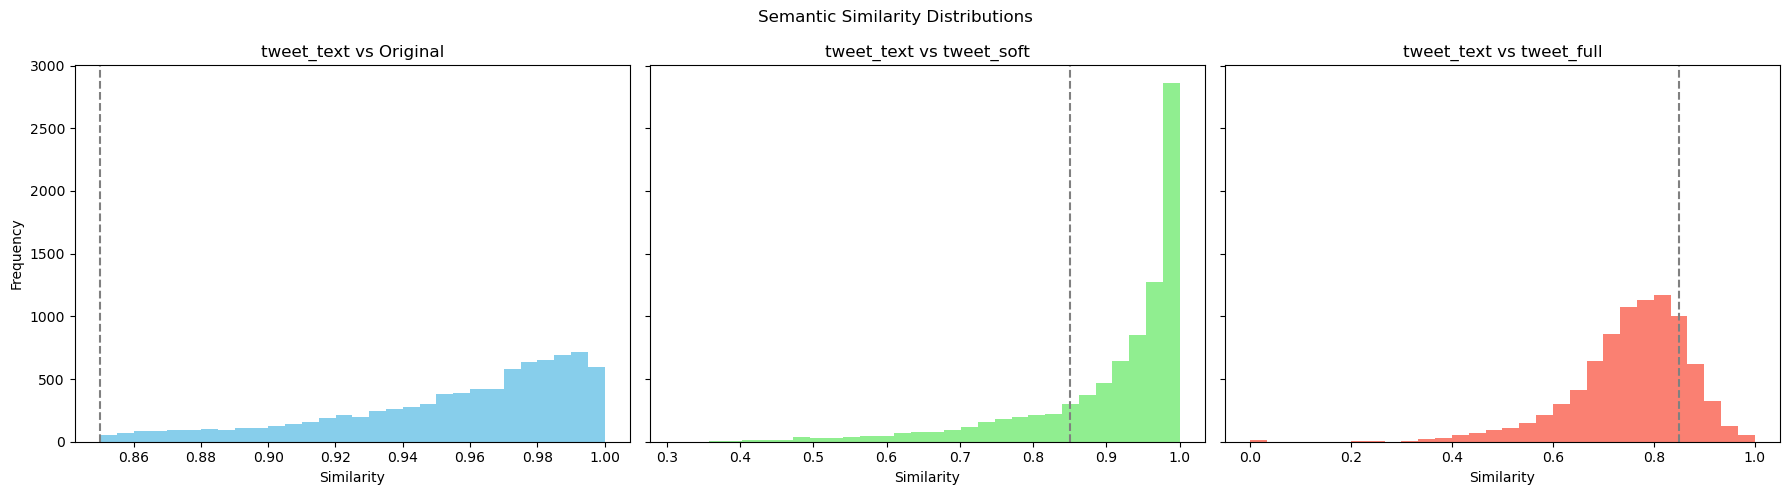

In [29]:
# --- Plot: Similarity distribution histograms ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# tweet_text vs original
axs[0].hist(similarity_text_original['similarity_score'], bins=30, color='skyblue')
axs[0].axvline(SIMILARITY_THRESHOLD, color='gray', linestyle='--', label=f'Threshold {SIMILARITY_THRESHOLD}')
axs[0].set_title('tweet_text vs Original')
axs[0].set_xlabel('Similarity')
axs[0].set_ylabel('Frequency')

# tweet_text vs tweet_soft
axs[1].hist(similarity_text_soft['similarity_score'], bins=30, color='lightgreen')
axs[1].axvline(SIMILARITY_THRESHOLD, color='gray', linestyle='--')
axs[1].set_title('tweet_text vs tweet_soft')
axs[1].set_xlabel('Similarity')

# tweet_text vs tweet_full
axs[2].hist(similarity_text_full['similarity_score'], bins=30, color='salmon')
axs[2].axvline(SIMILARITY_THRESHOLD, color='gray', linestyle='--')
axs[2].set_title('tweet_text vs tweet_full')
axs[2].set_xlabel('Similarity')

plt.suptitle('Semantic Similarity Distributions')
plt.tight_layout()
plt.show()

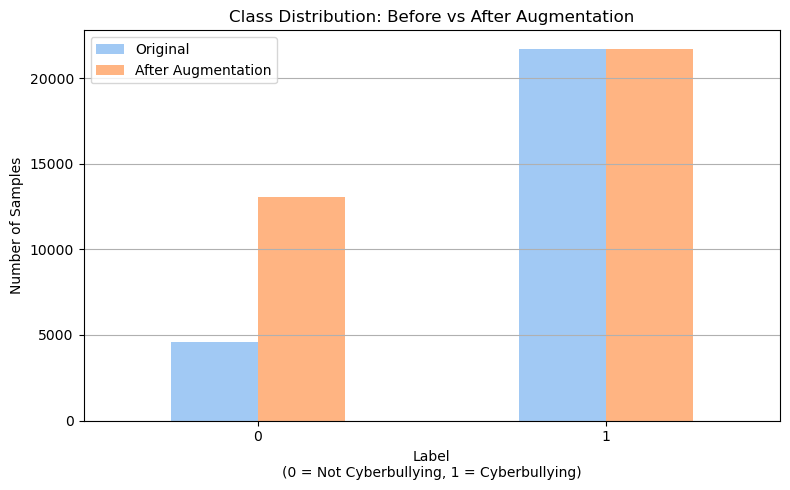

In [30]:
# --- Class Distribution: Before vs After Augmentation ---
# Count number of samples per class in original and final datasets
original_counts = cleaned_df['is_cyberbullying'].value_counts().sort_index()
augmented_counts = df_combined['label'].value_counts().sort_index()

# Create comparative bar chart
df_class_distribution = pd.DataFrame({
    'Original': original_counts,
    'After Augmentation': augmented_counts
})

df_class_distribution.plot(kind='bar', figsize=(8, 5), color=['#a1c9f4', '#ffb482'])

plt.title("Class Distribution: Before vs After Augmentation")
plt.xlabel("Label\n(0 = Not Cyberbullying, 1 = Cyberbullying)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
